In [8]:
import io
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from google.colab import files

# **Оценка выживаемости пассажиров**


# 1. Загружаем данные

Загружаем файл из локальной директории на компьютере:

In [9]:
uploaded = files.upload()
for filename in uploaded:
    data_raw = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving titanic.csv to titanic.csv


В данном датасете представлена информация о 1309 пассажирах «Титаника». Для каждого из них указаны следующие характеристики: факт выживания, класс обслуживания, имя, пол, возраст, количество братьев/сестер или супругов на борту, количество родителей или детей на борту, номер билета, его стоимость, место в корабле и порт посадки (Шербур, Куинстаун, Саутгемптон).

Первым шагом проанализируем структуру таблицы: определим количество записей (пассажиров) и перечень признаков (столбцов).

In [11]:
data_raw.shape

(1309, 12)

In [12]:
data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,"8,05",NaN,S
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,"108,9",C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,"38,5",0,0,SOTON/O.Q. 3101262,"7,25",NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,"8,05",NaN,S


Метод `data_raw.head()` отображает первые строки таблицы

In [13]:
data_raw.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,"8,4583",NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,"51,8625",E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,"21,075",NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,"11,1333",NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,"30,0708",NaN,C


Последние строки:

In [14]:
data_raw.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,"8,05",NaN,S
1305,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,"108,9",C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,"38,5",0,0,SOTON/O.Q. 3101262,"7,25",NaN,S
1307,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,"8,05",NaN,S
1308,1309,1,3,"Peter, Master. Michael J",male,NaN,1,1,2668,"22,3583",NaN,C


In [15]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  1309 non-null   int64 
 1   Survived     1309 non-null   int64 
 2   Pclass       1309 non-null   int64 
 3   Name         1309 non-null   object
 4   Sex          1309 non-null   object
 5   Age          1046 non-null   object
 6   SibSp        1309 non-null   int64 
 7   Parch        1309 non-null   int64 
 8   Ticket       1309 non-null   object
 9   Fare         1308 non-null   object
 10  Cabin        295 non-null    object
 11  Embarked     1307 non-null   object
dtypes: int64(5), object(7)
memory usage: 122.8+ KB


Мы видим, что столбцы (признаки) имеют имена

- `PassengerId` - Id пассажира
- `Survived` - выжил пассажир(1) или нет(0)
- `PClass` - номер класса места
- `Name` - имя пассажира
- `Sex` - пол
- `Age` - возраст
- `SibSp` - наличие на корабле у пассажира брата/сестры, мужа/жены
- `Parch` - наличие на кораблей детей/родителей
- `Ticket` - номер(индекс) билета
- `Fare` - цена билета
- `Cabin` - место пассажира
- `Embarked` - пункт отправления

Признак `PClass` - номинальный (категориальный), `Survived`, `Sex` - бинарный,  `PassengerId`, `Age`, `SibSp`, `Parch`, `Fare` - количественный (числовой), остальные признаки - текстовые.

Требуется предсказать бинарный признак `Survived` по остальным признакам. Это *задача восстановления регрессии*.

Столбцы `'Pclass'` и `'Survived'` содержат категориальные значения. Пока они имеют тип `'int64`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [16]:
data_raw['Pclass'] = data_raw['Pclass'].astype('category')
data_raw['Survived'] = data_raw['Survived'].astype('category')

In [17]:
data_raw['Pclass'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64)

In [18]:
data_raw['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

Столбцы `'Age'` и `'Fare'` содержат категориальные значения. Пока они имеют тип `'object`'. Заменим тип на числовой:

In [19]:
data_raw['Age'] = pd.to_numeric(data_raw['Age'], errors='coerce')
data_raw['Fare'] = pd.to_numeric(data_raw['Fare'], errors='coerce')

Информация о числовых признаках:

In [20]:
data_raw.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1001.000000,1309.000000,1309.000000,229.000000
mean,655.000000,30.147852,0.498854,0.385027,33.179039
std,378.020061,14.179637,1.041658,0.865560,43.788149
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,13.000000
50%,655.000000,28.000000,0.000000,0.000000,26.000000
75%,982.000000,39.000000,1.000000,0.000000,30.000000
max,1309.000000,80.000000,8.000000,9.000000,263.000000


Информация о категориальных признаках

In [21]:
data_raw.describe(include=['category'])

,Survived,Pclass
count,1309,1309
unique,2,3
top,0,3
freq,809,709


## Пропущенные значения:

In [22]:
data_raw.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,308
SibSp,0
Parch,0
Ticket,0
Fare,1080


In [23]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

['Age', 'Fare', 'Cabin', 'Embarked']

Столбец `Cabin` содержит много пропущенных значений, что делает проблематичным его заполнение. Поэтому целесообразней его удалить, т.к. маловероятно, что он даст ценную информацию. Что касаемо столбца `Embarked`, `Age` и `Fare` то можно эти пропуски заполнить наиболее часто встречающимся значением в столбце(модой):

In [24]:
data_raw = data_raw.drop('Cabin', axis=1)

mode_age = data_raw['Age'].mode()[0]
data_raw['Age'].fillna(mode_age, inplace=True)

mode_embarked = data_raw['Embarked'].mode()[0]
data_raw['Embarked'].fillna(mode_embarked, inplace=True)

mode_fare = data_raw['Fare'].mode()[0]
data_raw['Fare'].fillna(mode_fare, inplace=True)

/tmp/ipython-input-1483742009.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['Age'].fillna(mode_age, inplace=True)
/tmp/ipython-input-1483742009.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## 3. Визуализизация и нахождение основных числовых харакстеристик

Предположим, что выживаемость пассажира зависит от его возраста пола и класса.
Построим поэтому диаграмму рассеивания для двух признаков: `Survived` и `Age`.


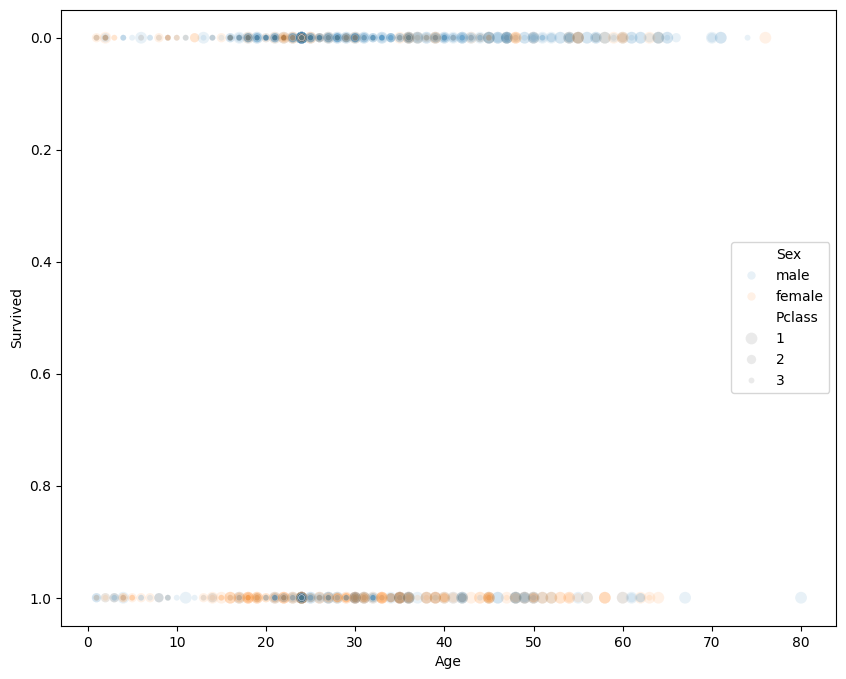

In [26]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Age', y='Survived', size='Pclass', hue='Sex', data=data_raw, alpha=0.1)
pass

На димаграмме видно, что линия у 1(выживших) имеет наибольшую толщину в диапазоне от 10 до 30 лет, т.е. среди выживших больше людей именно этого возраста. Можем заметить что среди выживших преобладают пассажиры 1-го класса. Так же не трудно заметить, что среди выживщих больше женщин.

Все диаграммы рассеивания:

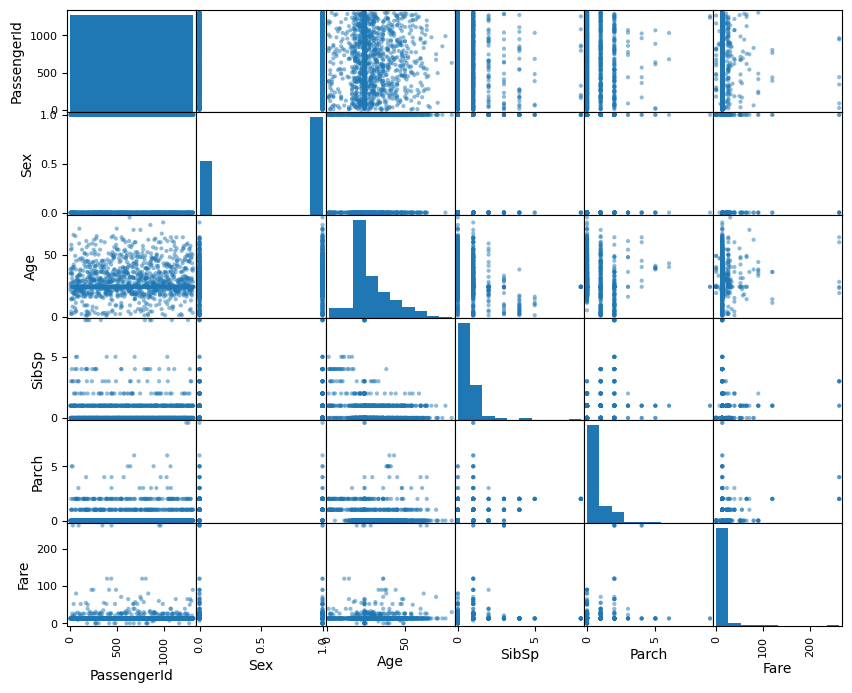

In [67]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

Теперь найдем основные числовые характеристики(среднее, разброс, корреляционную матрицу) для каждого столбца с числовым значением:

In [28]:
numeric_cols = data_raw.select_dtypes(include='number')
mean_values = numeric_cols.mean()
print(mean_values)

PassengerId    655.000000
Age             28.701299
SibSp            0.498854
Parch            0.385027
Fare            16.530176
dtype: float64


Можем заметить что средний возраст пассажиров состалял 28 лет. В большинстве случаем пассажир путешествовал один, без семьи. Так же средняя цена билета составляла 16 фунтов стерлинга

In [29]:
numeric_cols = data_raw.select_dtypes(include='number')
std_values = numeric_cols.std()
print(std_values)

PassengerId    378.020061
Age             12.669771
SibSp            1.041658
Parch            0.865560
Fare            19.825347
dtype: float64


Данные демонстрируют значительный разброс в стоимости билетов, что указывает на сильное социальное расслоение среди пассажиров.
Возраст пассажиров варьируется в умеренных пределах, показывая разнообразный возрастной состав от детей до пожилых людей.
При этом большинство пассажиров путешествовали в одиночку или с одним родственником

In [34]:
numeric_cols = data_raw.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

             PassengerId       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.040391 -0.055224  0.008942 -0.027428
Age             0.040391  1.000000 -0.174654 -0.092055  0.066463
SibSp          -0.055224 -0.174654  1.000000  0.373587  0.134526
Parch           0.008942 -0.092055  0.373587  1.000000  0.201814
Fare           -0.027428  0.066463  0.134526  0.201814  1.000000


Корреляционная матрица показывает в основном слабые связи между числовыми признаками. Наиболее заметная корреляция наблюдается между количеством братьев/сестер и родителей/детей (0.37). Остальные зависимости практически отсутствуют

## 4. Обработка категориальных признаков
Рассмотрим сколько раз номинальные переменные принимают то или иное значение

In [38]:
data_raw['Survived'].value_counts()

,count
Survived,
0,809
1,500


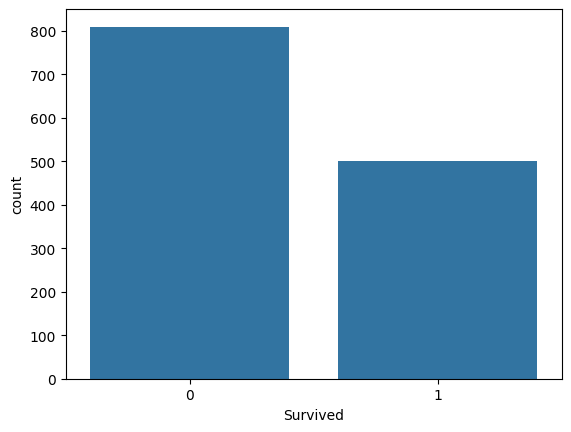

In [39]:
sns.countplot(x='Survived', data=data_raw)
pass

In [45]:
data_raw['Pclass'].value_counts().index

CategoricalIndex([3, 1, 2], categories=[1, 2, 3], ordered=False, dtype='category', name='Pclass')

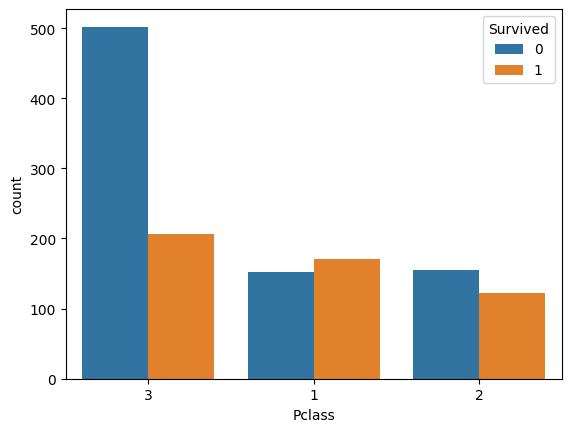

In [46]:
sns.countplot(x='Pclass', order=data_raw['Pclass'].value_counts().index, hue='Survived', data=data_raw)
pass

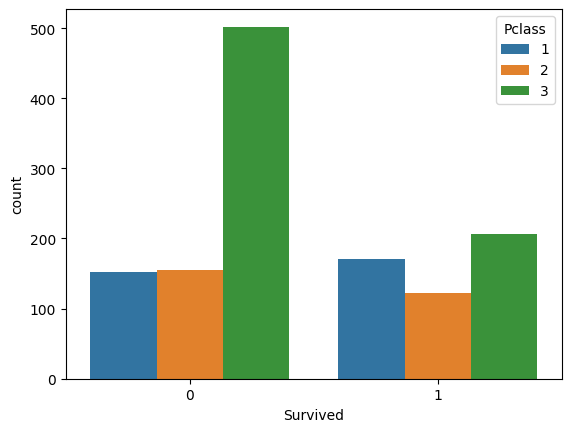

In [47]:
sns.countplot(x='Survived', hue='Pclass', data=data_raw)
pass

## 5. Разбивка на тестовую и тренеровочную выборки
Для предсказания выживания будем использовать все входные признаки, кроме Name, PassengerId Survived, Ticket, Embarked
Преобразуем значения пола male/female в бинарные

In [58]:
data_raw['Sex'] = data_raw['Sex'].map({'male': 1, 'female': 0})
X = data_raw.drop(['Survived', 'Name', 'PassengerId', 'Ticket', 'Embarked'], axis=1)
y = data_raw['Survived']

Разобьем данные на обучающую и тестовую выборки в пропорции 2:1 (68% - обучающая выборка, 32% - тестовая):

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.32, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(890, 419)

##6. Запуск классификатора
Для данного датасета нормализация не нужна.
Все числа здесь примерно одного порядка - возраст (0-80), цена билета (0-500), а не как бывает с разницей в миллионы раз. К тому же самые важные признаки здесь - это текстовые данные, а не числовые.

 Для этого датасета оптимальны Случайный лес и Градиентный бустинг, потому что в Titanic присутствуют как числовые (возраст, стоимость билета), так и категориальные признаки (пол, класс каюты). Они не требуют предварительной нормализации данных и устойчивы к пропускам и выбросам, которые есть в датасете


Для примера возьмем Случайный лес (Random Forest)

In [60]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [61]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [66]:
RMSE_table = pd.DataFrame(columns=['Train RMSE', 'Test RMSE'])
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,Train RMSE,Test RMSE
Random Forest,0.312773,0.477047


Как видно, обучающая модель демонстрирует достаточно низкую ошибку, что свидетельствует о хорошем соответствии обучающим данным. Что касается тестовой выборки, то ошибка несколько выше, что указывает на некоторую потерю точности при обобщении на новые данные. Это нормальное явление, так как модель может незначительно "подстраиваться" под обучающие данные.

In [65]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
Random Forest,0.5842,0.042535


Найдем оптимальный гиперпараметр

In [68]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
!pip install feature_engine
from feature_engine.selection import DropFeatures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.6 MB/s eta 0:00:00


In [70]:
ppl = Pipeline([
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', RandomForestRegressor())
])

In [72]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

(0.399567605008064, 0.5218464971398699)

## 7. Общие выводы

В ходе исследования был проанализирован датасет "Титаник" с целью выявления факторов, влияющих на выживаемость пассажиров. Анализ показал наличие статистически значимых зависимостей между выживаемостью и следующими признаками: полом (среди женщин процент выживших значительно выше), классом каюты (наибольшая выживаемость наблюдалась среди пассажиров первого класса) и возрастом (наибольшая концентрация выживших пришлась на возрастную группу 10-30 лет).

Были рассчитаны и проанализированы основные статистические характеристики числовых признаков, а также проведен анализ распределения категориальных переменных. Для построения прогнозной модели данные были разделены на тренеровочную и тестовую выборки.

В качестве базового алгоритма был применен классификатор Random Forest, для которого были рассчитаны метрики качества на обеих выборках. В дальнейшем для оптимизации модели использовался Pipeline с подбором оптимальных гиперпараметров, после чего проведено повторное обучение и оценка эффективности модели на обучающей и тестовой выборках с вычислением соответствующих метрик ошибок.